In [1]:
# Import numpy+extensions, i/o functions, preprocessing, and visualization.
import numpy as numx
import pydeep.base.numpyextension as numxext
import pydeep.misc.io as io
import pydeep.preprocessing as pre
import pydeep.misc.visualization as vis
import math
# Model imports: RBM estimator, model and trainer module
import pydeep.rbm.estimator as estimator
import pydeep.rbm.model as model
import pydeep.rbm.trainer as trainer

import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<h1> Random Rotation in 3D Space

In [2]:
def random_rotation_matrix():
    theta = np.arccos(2*np.random.uniform(low = 0,high = 1)-1)
    phi = np.random.uniform(low = 0,high = 2*np.pi)
    u = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
    theta = np.random.uniform(low = 0,high = 2*np.pi)
    A = np.zeros((3,3))
    A[0][0] = np.cos(theta) + (u[0]**2)*(1-np.cos(theta))
    A[0][1] = u[0]*u[1]*(1-np.cos(theta)) - u[2]*np.sin(theta)
    A[0][2] = u[0]*u[2]*(1-np.cos(theta)) + u[1]*np.sin(theta)
    A[1][0] = u[1]*u[0]*(1-np.cos(theta)) + u[2]*np.sin(theta)
    A[1][1] = np.cos(theta) + (u[1]**2)*(1-np.cos(theta))
    A[1][2] = u[1]*u[2]*(1-np.cos(theta)) - u[0]*np.sin(theta)
    A[2][0] = u[2]*u[0]*(1-np.cos(theta)) - u[1]*np.sin(theta)
    A[2][1] = u[2]*u[1]*(1-np.cos(theta)) + u[0]*np.sin(theta)
    A[2][2] = np.cos(theta) + (u[2]**2)*(1-np.cos(theta))
    return A

In [3]:
def rotate_data(A,data):
    data = np.array(data)
    m = np.shape(data)[1]
    for i in range(m):
        data[:,i] = np.matmul(A,data[:,i])
    return data

<h1>Noisy Rodney

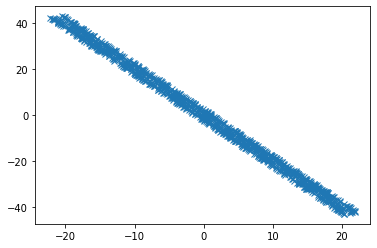

In [4]:
def return_rod(m,r,z_stretch):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    z_eps = np.random.normal(size = m)*noise_parameter
    x_eps = np.random.normal(size = m)*noise_parameter
    # create dataset 
    Theta = 2*np.pi*np.random.rand(m) - np.pi
    X = r*(1+x_eps)*np.cos(Theta)
    Y = np.random.uniform(low= -z_stretch/2,high = z_stretch/2,size = m)
    Z = r*(1+z_eps)*np.sin(Theta)
    data_rod = np.array([X,Y,Z])
    A = random_rotation_matrix()
    [X,Y,Z] = rotate_data(A,data_rod)
    data_rod = np.array([X,Y,Z])
    return data_rod

[X,Y,Z] = return_rod(1000,1,100) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')

Text(0.5, 0.92, 'A rare sighting of Rodney')

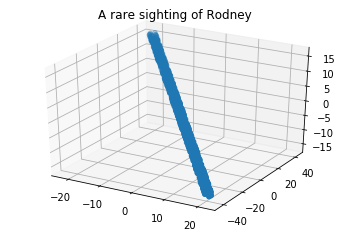

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)
plt.title('A rare sighting of Rodney')

<h1>Don't be Square

i m a lumberjack and i m okay



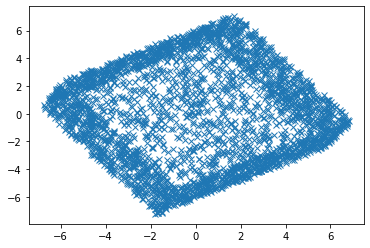

In [6]:
def return_square(m):
    m = m//6;
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    # create dataset
    L  = np.random.uniform(1,10)
    
    X1 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y1 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z1 = np.zeros(m)+(L/2+z_eps)
    
    X2 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y2 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z2 = np.zeros(m)+(-L/2+z_eps)
    
    X3 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y3 = np.zeros(m)+(L/2+y_eps)
    Z3 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
    X4 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y4 = np.zeros(m)+(-L/2+y_eps)
    Z4 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
    X5 = np.zeros(m)+(L/2+x_eps)
    Y5 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z5 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
    X6 = np.zeros(m)+(-L/2+x_eps)
    Y6 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z6 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
#    data_ellipsoid = np.array([[X1,Y1,Z1],[X2,Y2,Z2],[X3,Y3,Z3],[X4,Y4,Z4],[X5,Y5,Z5],[X6,Y6,Z6]])
    d1 = np.array([X1,Y1,Z1])
    d2 = np.array([X2,Y2,Z2])
    d3 = np.array([X3,Y3,Z3])
    d4 = np.array([X4,Y4,Z4])
    d5 = np.array([X5,Y5,Z5])
    d6 = np.array([X6,Y6,Z6])
    print("i m a lumberjack and i m okay")
    data_square = np.hstack((d1,d2,d3,d4,d5,d6))
    data_square = np.array(data_square)
    print("")
    A = random_rotation_matrix()
    [X,Y,Z] = rotate_data(A,data_square)
    data_square = np.array([X,Y,Z])
    return data_square

[X,Y,Z] = return_square(3000) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')

Text(0.5, 0.92, 'A square')

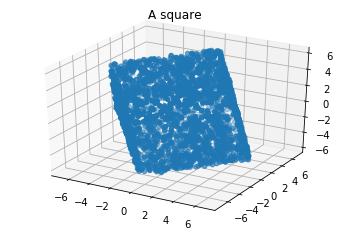

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)
plt.title('A square')

<h3>Noisy Sphere Data

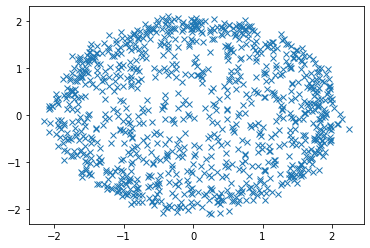

In [8]:
def return_sphere(m,r):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    
    # create dataset
    theta = 2*np.pi*np.random.uniform(low=0,high=1,size=m)
    phi = np.arccos(1 - 2 * np.random.uniform(low=0,high=1,size=m))
    X = r*(1+x_eps)*np.sin(phi) * np.cos(theta)
    Y = r*(1+y_eps)*np.sin(phi) * np.sin(theta)
    Z = r*(1+z_eps)*np.cos(phi)
#    print(np.shape(X))
    
    data_sphere = np.array([X,Y,Z])
#    print(np.shape(data_sphere))
    return data_sphere

[X,Y,Z] = return_sphere(1000,2) #This would be an m by 3 array of coordinates which could be put into the neural network.
plt.plot(X,Y, 'x')

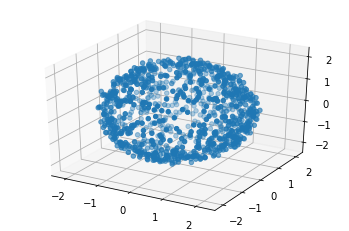

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)

<h3> Grid on a sphere

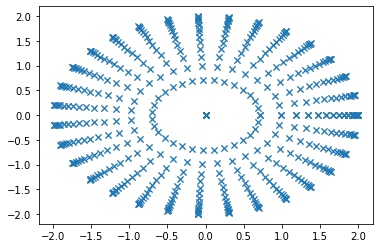

In [10]:
def return_sphere_grid(m,r):
    
    theta = 2*np.pi*np.linspace(0,1,num=m)
    phi = np.arccos(1 - 2 * np.linspace(0,1,num=m))
    phi , theta = np.meshgrid(phi, theta)
    
    X = r*np.sin(phi) * np.cos(theta)
    Y = r*np.sin(phi) * np.sin(theta)
    Z = r*np.cos(phi)
#    print(np.shape(X))
    X = np.reshape(X,(m**2))
    Y = np.reshape(Y,(m**2))
    Z = np.reshape(Z,(m**2))
#    print(np.shape(X))
    
    data_sphere = np.array([X,Y,Z])
    return data_sphere

[X,Y,Z] = return_sphere_grid(32,2) #This would be an m by 3 array of coordinates which could be put into the neural network.
plt.plot(X,Y, 'x')

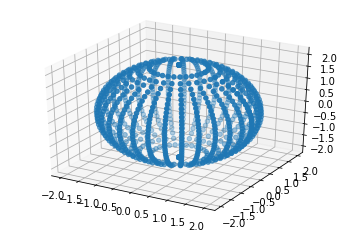

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)

<h3> Grid on a Ellipsoid

In [12]:
def return_ellipsoid_grid(m,x_stretch,y_stretch,z_stretch):
    
    theta = 2*np.pi*np.linspace(0,1,num=m)
    phi = np.arccos(1 - 2 * np.linspace(0,1,num=m))
    phi , theta = np.meshgrid(phi, theta)
    
    X = x_stretch*np.sin(phi) * np.cos(theta)
    Y = y_stretch*np.sin(phi) * np.sin(theta)
    Z = z_stretch*np.cos(phi)

    X = np.reshape(X,(m**2))
    Y = np.reshape(Y,(m**2))
    Z = np.reshape(Z,(m**2))
#    print(np.shape(X))
    
    data_ellipsoid= np.array([X,Y,Z])
    A = random_rotation_matrix()
    for i in range(m**2):
        data_ellipsoid[:,i] = np.matmul(A,data_ellipsoid[:,i])
    return data_ellipsoid

<h3>Noisy Ellipsoid

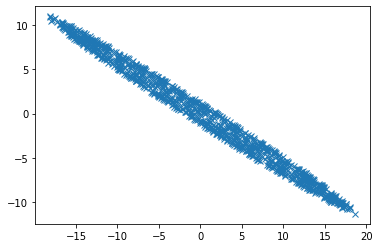

In [13]:
def return_ellipsoid(m,a_x,b_y,c_z):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    # create dataset

    phi = np.arccos(1 - 2 * np.random.uniform(low=0,high=1,size=m))    
    theta = 2*np.pi*np.random.uniform(low=0,high=1,size=m)
#    phi = 2*np.pi*np.random.rand(m) - np.pi
#    theta = np.pi*np.random.rand(m) - 0.5*np.pi
    X = a_x*(1+x_eps)*np.sin(phi) * np.cos(theta)
    Y = b_y*(1+y_eps)*np.sin(phi) * np.sin(theta)
    Z = c_z*(1+z_eps)*np.cos(phi)
    data_ellipsoid = np.array([X,Y,Z])
    
### Randomly Rotating the ellipsoid
    A = random_rotation_matrix()
    [X,Y,Z] = rotate_data(A,data_ellipsoid)
    data_ellipsoid = np.array([X,Y,Z])

    return data_ellipsoid

[X,Y,Z] = return_ellipsoid(1000,20,1,1) #This would be an m by 3 array of coordinates which could be put into the neural network.
plt.plot(X,Y, 'x')

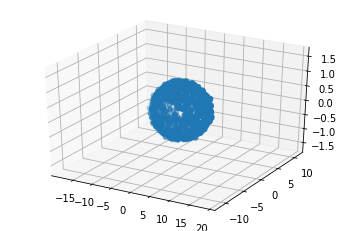

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)

In [15]:
## Set random seed (optional)
## (optional, if stochastic processes are involved we get the same results)
numx.random.seed(42)

In [16]:
training_data_size = 10000
group_size = training_data_size//2
data_size = 1000
training_set = np.zeros((training_data_size,3,data_size))
for i in range(group_size):
    
    #r = 2
    r = np.random.uniform(1,3)
    training_set[i,:,:]= return_sphere(data_size,r)

#    stretch_factor = 20
    stretch_factor = np.random.uniform(low = 20, high = 30)
    training_set[group_size+i,:,:] = return_ellipsoid(data_size,stretch_factor,1,1)
    
#training_set[:group_size,:] = np.random.uniform(size =(group_size,data_size))
#training_set[group_size:,:] = np.random.normal(size =(group_size,data_size))
#print(training_set[0])
training_set = np.random.permutation(training_set)
#print(training_set[0])
data = torch.FloatTensor(training_set)
#print(np.shape(data))
#print(data_tensor[-1])
data = data.reshape([training_data_size,3*data_size]) 
data = data.numpy()
#print(type(data))
#print(np.shape(data))

In [17]:
# Set input/output dimensions
v1 = data_size * 3
v2 = 1
h1 = 32  # hidden
h2 = 1

# Whiten data using ZCA
zca = pre.ZCA(v1 * v2)
zca.train(data)
data = zca.project(data)

In [18]:
# Split into training/test dataw
train_data = data[0:5000]
test_data = data[5000:10000]

#Set restriction factor, learning rate, batch size and maximal number of epochs
restrict = 0.01 * numx.max(numxext.get_norms(train_data, axis=1))
eps = 0.1
batch_size = 500
max_epochs = 400

In [19]:
# Create model, initial weights=Glorot init., initial sigma=1.0, initial bias=0,
# no centering (Usually pass the data=training_data for a automatic init. that is
# set the bias and sigma to the data mean and data std. respectively, for
# whitened data centering is not an advantage)
rbm = model.GaussianBinaryVarianceRBM(number_visibles=v1 * v2,
                                      number_hiddens=h1 * h2,
                                      initial_weights='AUTO',
                                      initial_visible_bias=0,
                                      initial_hidden_bias=0,
                                      initial_sigma=1.0,
                                      initial_visible_offsets=0.0,
                                      initial_hidden_offsets=0.0,
                                      dtype=numx.float64)

# Set the hidden bias such that the scaling factor is 0.01
rbm.bh = -(numxext.get_norms(rbm.w + rbm.bv.T, axis=0) - numxext.get_norms(
    rbm.bv, axis=None)) / 2.0 + numx.log(0.01)
rbm.bh = rbm.bh.reshape(1, h1 * h2)

In [20]:
# Training with CD-1
k = 1
trainer_cd = trainer.CD(rbm)

# Train model, status every 10th epoch
step = 10
print('Training')
print('Epoch\tRE train\tRE test')
for epoch in range(0, max_epochs + 1, 1):

    # Shuffle training samples (optional)
    train_data = numx.random.permutation(train_data)

    # Print epoch and reconstruction errors every 'step' epochs.
    if epoch % step == 0:
        RE_train = numx.mean(estimator.reconstruction_error(rbm, train_data))
        RE_test = numx.mean(estimator.reconstruction_error(rbm, test_data))
        print('%5d \t%0.5f \t%0.5f' % (epoch, RE_train, RE_test))

    # Train one epoch with gradient restriction/clamping
    # No weight decay, momentum or sparseness is used
    for b in range(0, train_data.shape[0], batch_size):
        trainer_cd.train(data=train_data[b:(b + batch_size), :],
                         num_epochs=1,
                         epsilon=[eps, 0.0, eps, eps * 0.1],
                         k=k,
                         momentum=0.0,
                         reg_l1norm=0.0,
                         reg_l2norm=0.0,
                         reg_sparseness=0,
                         desired_sparseness=None,
                         update_visible_offsets=0.0,
                         update_hidden_offsets=0.0,
                         offset_typ='00',
                         restrict_gradient=restrict,
                         restriction_norm='Cols',
                         use_hidden_states=False,
                         use_centered_gradient=False)


Training
Epoch	RE train	RE test
    0 	0.99562 	1.00269
   10 	0.99169 	1.00276
   20 	0.98698 	1.00279
   30 	0.98447 	1.00282
   40 	0.98312 	1.00286
   50 	0.98235 	1.00291
   60 	0.98185 	1.00296
   70 	0.98152 	1.00302
   80 	0.98129 	1.00306
   90 	0.98111 	1.00310
  100 	0.98097 	1.00313
  110 	0.98086 	1.00316
  120 	0.98079 	1.00318
  130 	0.98071 	1.00320
  140 	0.98066 	1.00322
  150 	0.98061 	1.00324
  160 	0.98056 	1.00325
  170 	0.98053 	1.00327
  180 	0.98050 	1.00328
  190 	0.98047 	1.00329
  200 	0.98045 	1.00330
  210 	0.98042 	1.00331
  220 	0.98041 	1.00332
  230 	0.98039 	1.00333
  240 	0.98037 	1.00333
  250 	0.98036 	1.00334
  260 	0.98035 	1.00334
  270 	0.98034 	1.00335
  280 	0.98033 	1.00335
  290 	0.98032 	1.00336
  300 	0.98031 	1.00336
  310 	0.98030 	1.00337
  320 	0.98029 	1.00337
  330 	0.98029 	1.00337
  340 	0.98028 	1.00338
  350 	0.98028 	1.00338
  360 	0.98027 	1.00338
  370 	0.98027 	1.00339
  380 	0.98026 	1.00339
  390 	0.98026 	1.00339
  400 	0

In [21]:
# print(rbm.w)
# print(rbm.bh)
# print(rbm.output_dim)

In [33]:
from pydeep.base.activationfunction import Sigmoid
import pydeep.rbm.dbn as dbn

test_data_size = 10000           
group_size = test_data_size//2
data_size = 1000
test_set = np.zeros((test_data_size,3,data_size))
label_sphere = np.zeros(group_size)
label_ellipsoid= np.zeros(group_size)

for i in range(group_size):
    #r = 2
    r = np.random.uniform(1,3)
    label_sphere[i] = r
    test_set[i,:,:] = return_sphere(data_size,r)
    
    #stretch_factor = 20
    stretch_factor = np.random.uniform(low = 20, high = 30)
    label_ellipsoid[i] = stretch_factor
    test_set[group_size+i,:,:] = return_ellipsoid(data_size,stretch_factor,1,1)
    
data = torch.FloatTensor(test_set)
data = data.reshape([test_data_size,3*data_size]) 
data = data.numpy()
print(type(data))
print(np.shape(data))

number_of_points = test_data_size       # number of training examples (spheres and ellipsoids)

sphere_points    = data[0:group_size]   # the first half of the data array are spheres

ellipsoid_points = data[group_size:test_data_size] # the last half of the data array are ellipsoids

ellipsoid_feature1 = np.zeros(number_of_points//2)  # we have as many ellipsoid feature1s as there are ellipsoids (i.e. half of the test data)
ellipsoid_feature2 = np.zeros(number_of_points//2)
ellipsoid_feature3 = np.zeros(number_of_points//2)
ellipsoid_feature4 = np.zeros(number_of_points//2)
ellipsoid_feature5 = np.zeros(number_of_points//2)
ellipsoid_feature6 = np.zeros(number_of_points//2)
ellipsoid_feature7 = np.zeros(number_of_points//2)
ellipsoid_feature8 = np.zeros(number_of_points//2)
ellipsoid_feature9 = np.zeros(number_of_points//2)
ellipsoid_feature10 = np.zeros(number_of_points//2)
ellipsoid_feature11 = np.zeros(number_of_points//2)
ellipsoid_feature12 = np.zeros(number_of_points//2)
ellipsoid_feature13 = np.zeros(number_of_points//2)
ellipsoid_feature14 = np.zeros(number_of_points//2)
ellipsoid_feature15 = np.zeros(number_of_points//2)
ellipsoid_feature16 = np.zeros(number_of_points//2)
ellipsoid_feature17 = np.zeros(number_of_points//2)
ellipsoid_feature18 = np.zeros(number_of_points//2)
ellipsoid_feature19 = np.zeros(number_of_points//2)
ellipsoid_feature20 = np.zeros(number_of_points//2)
ellipsoid_feature21 = np.zeros(number_of_points//2)
ellipsoid_feature22 = np.zeros(number_of_points//2)
ellipsoid_feature23 = np.zeros(number_of_points//2)
ellipsoid_feature24 = np.zeros(number_of_points//2)
ellipsoid_feature25 = np.zeros(number_of_points//2)
ellipsoid_feature26 = np.zeros(number_of_points//2)
ellipsoid_feature27 = np.zeros(number_of_points//2)
ellipsoid_feature28 = np.zeros(number_of_points//2)
ellipsoid_feature29 = np.zeros(number_of_points//2)
ellipsoid_feature30 = np.zeros(number_of_points//2)
ellipsoid_feature31 = np.zeros(number_of_points//2)
ellipsoid_feature32 = np.zeros(number_of_points//2)



sphere_feature1 = np.zeros(number_of_points//2)
sphere_feature2 = np.zeros(number_of_points//2)
sphere_feature3 = np.zeros(number_of_points//2)
sphere_feature4 = np.zeros(number_of_points//2)
sphere_feature5 = np.zeros(number_of_points//2)
sphere_feature6 = np.zeros(number_of_points//2)
sphere_feature7 = np.zeros(number_of_points//2)
sphere_feature8 = np.zeros(number_of_points//2)
sphere_feature9 = np.zeros(number_of_points//2)
sphere_feature10 = np.zeros(number_of_points//2)
sphere_feature11 = np.zeros(number_of_points//2)
sphere_feature12 = np.zeros(number_of_points//2)
sphere_feature13 = np.zeros(number_of_points//2)
sphere_feature14 = np.zeros(number_of_points//2)
sphere_feature15 = np.zeros(number_of_points//2)
sphere_feature16 = np.zeros(number_of_points//2)
sphere_feature17 = np.zeros(number_of_points//2)
sphere_feature18 = np.zeros(number_of_points//2)
sphere_feature19 = np.zeros(number_of_points//2)
sphere_feature20 = np.zeros(number_of_points//2)
sphere_feature21 = np.zeros(number_of_points//2)
sphere_feature22 = np.zeros(number_of_points//2)
sphere_feature23 = np.zeros(number_of_points//2)
sphere_feature24 = np.zeros(number_of_points//2)
sphere_feature25 = np.zeros(number_of_points//2)
sphere_feature26 = np.zeros(number_of_points//2)
sphere_feature27 = np.zeros(number_of_points//2)
sphere_feature28 = np.zeros(number_of_points//2)
sphere_feature29 = np.zeros(number_of_points//2)
sphere_feature30 = np.zeros(number_of_points//2)
sphere_feature31 = np.zeros(number_of_points//2)
sphere_feature32 = np.zeros(number_of_points//2)

for i in range(number_of_points//2):

    sphere_feature = Sigmoid.f(numx.dot(rbm.w.T,sphere_points[i])+ rbm.bv.T)   
    ellipsoid_feature =  Sigmoid.f(numx.dot(rbm.w.T,ellipsoid_points[i]) + rbm.bv.T)
    
###    uniform_feature = dbn.forward_propagate(uniform_points[i], sample=False)
###    normal_feature = dbn.forward_propagate(normal_points[i], sample=False)
###    uniform_feature= uniform_feature.detach().numpy()
###    normal_feature = normal_feature.detach().numpy()
#    normal_feature1[i] = normal_feature1[i].bcast(1,2)

    ellipsoid_feature1[i] = ellipsoid_feature[0,0]
    ellipsoid_feature2[i] = ellipsoid_feature[0,1]
    ellipsoid_feature3[i] = ellipsoid_feature[0,2]
    ellipsoid_feature4[i] = ellipsoid_feature[0,3]
    ellipsoid_feature5[i] = ellipsoid_feature[0,4]
    ellipsoid_feature6[i] = ellipsoid_feature[0,5]
    ellipsoid_feature7[i] = ellipsoid_feature[0,6]
    ellipsoid_feature8[i] = ellipsoid_feature[0,7]
    ellipsoid_feature9[i] = ellipsoid_feature[0,8]
    ellipsoid_feature10[i] = ellipsoid_feature[0,9]
    ellipsoid_feature11[i] = ellipsoid_feature[0,10]
    ellipsoid_feature12[i] = ellipsoid_feature[0,11]
    ellipsoid_feature13[i] = ellipsoid_feature[0,12]
    ellipsoid_feature14[i] = ellipsoid_feature[0,13]
    ellipsoid_feature15[i] = ellipsoid_feature[0,14]
    ellipsoid_feature16[i] = ellipsoid_feature[0,15]
    ellipsoid_feature17[i] = ellipsoid_feature[0,16]
    ellipsoid_feature18[i] = ellipsoid_feature[0,17]
    ellipsoid_feature19[i] = ellipsoid_feature[0,18]
    ellipsoid_feature20[i] = ellipsoid_feature[0,19]
    ellipsoid_feature21[i] = ellipsoid_feature[0,20]
    ellipsoid_feature22[i] = ellipsoid_feature[0,21]
    ellipsoid_feature23[i] = ellipsoid_feature[0,22]
    ellipsoid_feature24[i] = ellipsoid_feature[0,23]
    ellipsoid_feature25[i] = ellipsoid_feature[0,24]
    ellipsoid_feature26[i] = ellipsoid_feature[0,25]
    ellipsoid_feature27[i] = ellipsoid_feature[0,26]
    ellipsoid_feature28[i] = ellipsoid_feature[0,27]
    ellipsoid_feature29[i] = ellipsoid_feature[0,28]
    ellipsoid_feature30[i] = ellipsoid_feature[0,29]
    ellipsoid_feature31[i] = ellipsoid_feature[0,30]
    ellipsoid_feature32[i] = ellipsoid_feature[0,31]    
    
    
    
    sphere_feature1[i] = sphere_feature[0,0]
    sphere_feature2[i] = sphere_feature[0,1]
    sphere_feature3[i] = sphere_feature[0,2]
    sphere_feature4[i] = sphere_feature[0,3]
    sphere_feature5[i] = sphere_feature[0,4]
    sphere_feature6[i] = sphere_feature[0,5]
    sphere_feature7[i] = sphere_feature[0,6]
    sphere_feature8[i] = sphere_feature[0,7]
    sphere_feature9[i] = sphere_feature[0,8]
    sphere_feature10[i] = sphere_feature[0,9]
    sphere_feature11[i] = sphere_feature[0,10]
    sphere_feature12[i] = sphere_feature[0,11]
    sphere_feature13[i] = sphere_feature[0,12]
    sphere_feature14[i] = sphere_feature[0,13]
    sphere_feature15[i] = sphere_feature[0,14]
    sphere_feature16[i] = sphere_feature[0,15]
    sphere_feature17[i] = sphere_feature[0,16]
    sphere_feature18[i] = sphere_feature[0,17]
    sphere_feature19[i] = sphere_feature[0,18]
    sphere_feature20[i] = sphere_feature[0,19]
    sphere_feature21[i] = sphere_feature[0,20]
    sphere_feature22[i] = sphere_feature[0,21]
    sphere_feature23[i] = sphere_feature[0,22]
    sphere_feature24[i] = sphere_feature[0,23]
    sphere_feature25[i] = sphere_feature[0,24]
    sphere_feature26[i] = sphere_feature[0,25]
    sphere_feature27[i] = sphere_feature[0,26]
    sphere_feature28[i] = sphere_feature[0,27]
    sphere_feature29[i] = sphere_feature[0,28]
    sphere_feature30[i] = sphere_feature[0,29]
    sphere_feature31[i] = sphere_feature[0,30]
    sphere_feature32[i] = sphere_feature[0,31]


<class 'numpy.ndarray'>
(10000, 3000)


<h4> 2D Plot of Features for Spheres vs Ellipsoids

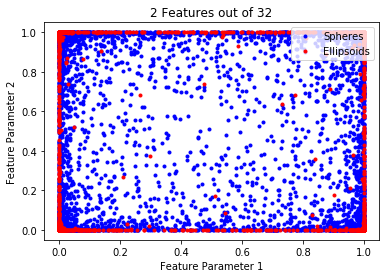

In [85]:
plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
#plt.title('Feature Extraction for Spheres vs Ellipsoids')
plt.title('2 Features out of {}'.format(h1))

plt.plot(sphere_feature1,sphere_feature2,'b.',label='Spheres')
plt.plot(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')

plt.legend(loc='upper right')
plt.savefig('nf1_32.png')

plt.show()

<h4> Plotting a 1D plot for the case of just one hidden node i.e. feature

In [86]:
# plt.figure()
# plt.xlabel('Feature Parameter 1')
# plt.ylabel('')
# #plt.title('Feature Extraction for Spheres vs Ellipsoids')
# plt.title("Spheres (r = 1 to 3) vs Ellipsoids (stretch = 20 to 30), #Hidden Nodes = 1")
# y = np.zeros(np.shape(sphere_feature1))
# plt.plot(sphere_feature1,y,'b.',label='Spheres')
# plt.plot(ellipsoid_feature1,y,'r.',label='Ellipsoids')
# plt.yticks([])


# plt.legend(loc='upper right')
# plt.grid()
# plt.show()

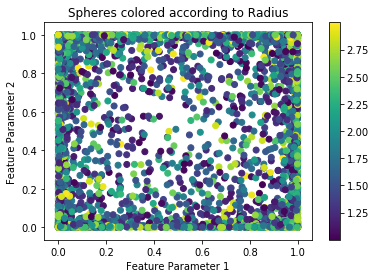

In [87]:
# Plotting spheres according to radius

plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
plt.title('Spheres colored according to Radius')
plt.scatter(sphere_feature1,sphere_feature2,c=label_sphere) #,label='Spheres')
cb = plt.colorbar()
#loc = np.arange(0,max(label_sphere),max(label_sphere)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
#plt.scatter(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')
plt.savefig('nf2_32.png')
#plt.legend(loc='upper right')
plt.show()


##print(np.size(uniform_feature))

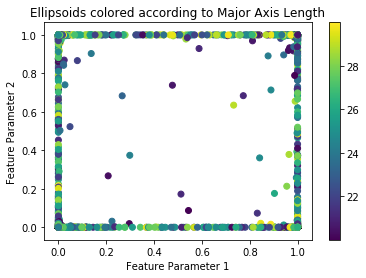

In [88]:
# Plotting Ellipsoids according to stretch

plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
plt.title('Ellipsoids colored according to Major Axis Length')
plt.scatter(ellipsoid_feature1,ellipsoid_feature2,c=label_ellipsoid) #,label='Ellipsoids')
cb = plt.colorbar()
plt.savefig('nf3_32.png')
#plt.legend(loc='upper right')
plt.show()


##print(np.size(uniform_feature))

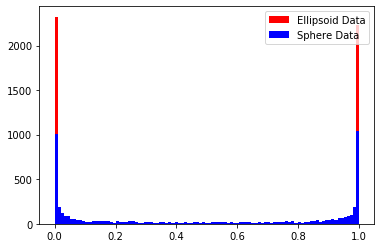

In [89]:
plt.figure()
bins = np.linspace(0, 1, 100)

plt.hist(ellipsoid_feature1,bins,color = 'red',label = 'Ellipsoid Data')
plt.hist(sphere_feature1,bins,color = 'blue', label = 'Sphere Data')

plt.legend(loc='upper right')

plt.show() #make the bar sizes the same!

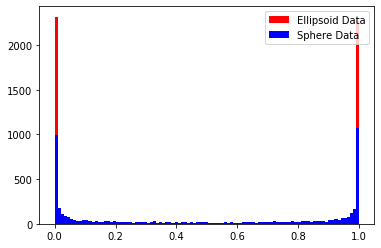

In [90]:
plt.figure()
bins = np.linspace(0, 1, 100)

plt.hist(ellipsoid_feature2,bins,color = 'red',label = 'Ellipsoid Data')
plt.hist(sphere_feature2,bins,color = 'blue', label = 'Sphere Data')

plt.legend(loc='upper right')

plt.show() #make the bar sizes the same!

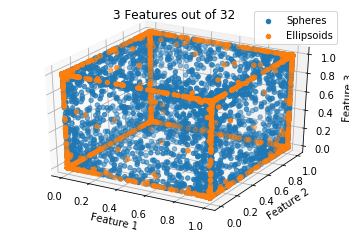

In [91]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure()
#3d plot
ax = plt.axes(projection='3d')
ax.scatter(sphere_feature1,sphere_feature2,sphere_feature3,label='Spheres')
ax.scatter(ellipsoid_feature1,ellipsoid_feature2,ellipsoid_feature3,label = 'Ellipsoids')
ax.set_title('3 Features out of {}'.format(h1))
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.savefig('nf4_32.png')



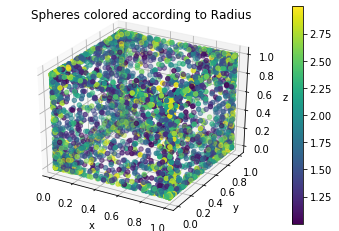

In [92]:
plt.figure()
ax = plt.axes(projection='3d')

sc = ax.scatter(sphere_feature1,sphere_feature2,sphere_feature3,c = label_sphere,label='Sphere')
cm = plt.cm.get_cmap('RdYlBu')
ax.set_title('Spheres colored according to Radius')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.legend()
#loc = np.arange(0,max(label_sphere),max(label_sphere)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
#plt.scatter(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')
plt.colorbar(sc)
plt.savefig('nf5_32.png')
plt.show()

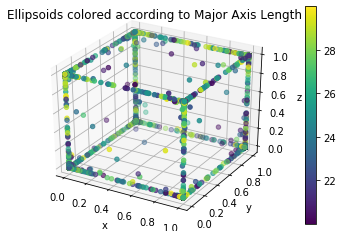

In [93]:
plt.figure()
ax = plt.axes(projection='3d')

sc2 = ax.scatter(ellipsoid_feature1,ellipsoid_feature2,ellipsoid_feature3,c = label_ellipsoid,label='Ellipsoid')
cm = plt.cm.get_cmap('RdYlBu')
ax.set_title('Ellipsoids colored according to Major Axis Length')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.legend()
#loc = np.arange(0,max(label_sphere),max(label_sphere)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
#plt.scatter(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')
plt.colorbar(sc2)
plt.savefig('nf6_32.png')
plt.show()